In [1]:
from sliderule import icesat2
import matplotlib.pyplot as plt
from pyproj import CRS, Transformer

region = [ {"lon": -160, "lat": -84},
           {"lon": -160, "lat": -85},
           {"lon": -150, "lat": -85},
           {"lon": -150, "lat": -84},
           {"lon": -160, "lat": -84} ]

icesat2.init("slideruleearth.io", True)
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "t0": "2019-01-01T00:00:00Z",
    "t1": "2019-01-25T00:00:00Z"
}
rsps = icesat2.atl06p(parms)
print(rsps)

                               w_surface_window_final  segment_id  spot  \
time                                                                      
2019-01-01 08:18:05.588722176                     3.0     1477285     5   
2019-01-01 08:18:05.591549184                     3.0     1477286     5   
2019-01-01 08:18:05.594375424                     3.0     1477287     5   
2019-01-01 08:18:05.597201920                     3.0     1477288     5   
2019-01-01 08:18:05.600021760                     3.0     1477289     5   
...                                               ...         ...   ...   
2019-01-24 22:05:11.844683520                     3.0     1536305     1   
2019-01-24 22:05:11.847479552                     3.0     1536306     1   
2019-01-24 22:05:11.850262528                     3.0     1536307     1   
2019-01-24 22:05:11.853042688                     3.0     1536308     1   
2019-01-24 22:05:11.855824128                     3.0     1536309     1   

                        

In [2]:
from pyproj import CRS, Transformer
def ll2xy(lon, lat):
    """
    Transform coordinates from input geodetic coordinates (lon, lat)
    to output Antarctic Polar Stereographic coordinates (x, y)
    Can also take lists of floats!

    Parameters
    lon - Geodetic longitude in EPSG:4326 [float]
    lat - Geodetic latitude in EPSG:4326 [float]

    Returns
    x - Antarctic Polar Stereographic (EPSG:3031) x [float]
    y - Antarctic Polar Stereographic (EPSG:3031) y [float]
    """
    
    crs_ll = CRS("EPSG:4326")
    crs_xy = CRS("EPSG:3031")
    ll_to_xy = Transformer.from_crs(crs_ll, crs_xy, always_xy = True)
    x, y = ll_to_xy.transform(lon, lat)
    return x, y

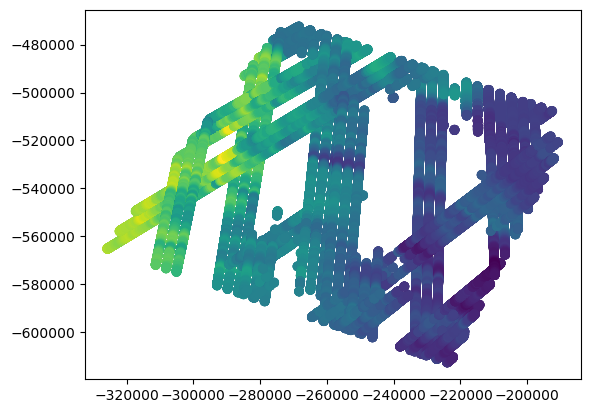

In [4]:
x,y = ll2xy(rsps['geometry'].x, rsps['geometry'].y)
plt.scatter(x,y,c=rsps['h_mean']) #in xy
#plt.scatter(rsps['geometry'].x, rsps['geometry'].y, c=rsps['h_mean']) # in lat lon